# 3.6 Lab: Linear Regression

source
https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.durbin_watson.html

https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate#:~:text=Omnibus%2FProb(Omnibus)%20%E2%80%93,the%20residuals%20are%20normally%20distributed.

https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate#:~:text=Omnibus%2FProb(Omnibus)%20%E2%80%93,the%20residuals%20are%20normally%20distributed.

https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.durbin_watson.html

https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html#Condition-number

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

https://docs.tigergraph.com/graph-ml/current/similarity-algorithms/#:~:text=Similarity%20algorithms%20assign%20a%20score,is%20the%20inverse%20of%20similarity.


## 3.6.1 Libraries

In [33]:
# in Python, module can be imported by a command similar to 'import numpy as np'. 
# it is a good practice to maintain a section at the beginning of the notebook to import all necessary modules.
# for new module, could use pip to install it. 
# for example 'pip install numpy'
# \stackrel{}{}
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from patsy import dmatrices

In [34]:
# since in Python, there is no default MASS module and Boston dataset, I will read in the Boston dataset from CSV. The data is in the ./data folder.
Boston = pd.read_csv('data/Boston.csv', header=0)
type(Boston)

pandas.core.frame.DataFrame

## 3.6.2 Simple Linear Regression

$Y = \beta_0 + \beta_1 X + \varepsilon$

$\varepsilon \stackrel{i.i.d}{\sim} \mathrm{N}(0,1)$

Here $\beta_0$ is the intercept (mean of $Y$ when $X=0$) and $\beta_1$ is the slope (the change in the mean of $Y$ when
$X$ increases by 1 unit). Of primary concern is whether $\beta_1 = 0$, which implies the mean of Y is constant ($\beta_0$),
and thus $Y$ and $X$ are not associated. It is convenient to view the regressor $X$ as controlled by the data analyst and
measured with negligible error, while the response $Y$ is a random variable. That is,
there is a probability distribution for $Y$ at each possible value for $X$. The mean of
this distribution is

$E(Y|X)=\mu_{Y|X}=\beta_0 + \beta_1 X$

and the variance is

$\mathrel{Var}(Y|X)=\sigma^2_{Y|X}=\sigma^2$

![alt text](images_SL/conditional_mu.PNG "Title")

## The major assumptions

1. The relationship between the response y and the regressors x is linear, at least
approximately.
2. The error term $\varepsilon$ has zero mean.
3. The error term $\varepsilon$ has constant variance $\sigma^2$.
4. The errors are uncorrelated.
5. The errors are normally distributed.

Generally regression equations are valid only over the region of the regressor
variables contained in the observed data.  Suppose
that data on $y$ and $x$ were collected in the interval $x_1 \leq x \leq x_2$. Over this interval the linear regression equation shown in Figure 1.5 is a good approximation of the true
relationship. However, suppose this equation were used to predict values of y for
values of the regressor variable in the region $x_2 \leq x \leq x_3$ . Clearly the linear regression model is not going to perform well over this range of x because of model error
or equation error. 

## Definition of Residuals

$e_i = y_i -\hat{y_i}= y_i - \hat\beta_0 -\hat\beta_1 x_i$

In [35]:
# use the commands we learned in the previous chapeter to exame the data.
#list(Boston) # or Boston.columns

In [36]:
Boston.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [37]:
Boston.shape

(506, 14)

In [38]:
# to have similar formula notation as R, use the following import. 
# One thing to note is that the ' ' for the formula part in fitting step and the '.fit()' at the end.
# import statsmodels.formula.api as smf, we would use smf to call the model. Of course, there are other ways to run linear regression in pythin, such as sklearn.
lm = smf.ols ('medv~lstat', data = Boston).fit()

lemma 1: a regression y ~ x is equivalent to y - mean(y) ~ x - mean(x)

$y - \bar{y} \sim x - \bar{x}$

$\sum e_i = \sum \hat{y_i}e_i =\sum x_ie_i =0$

$\sum y_i = \sum \hat{y_i}$

$\bar{y} =  \beta_0 + \beta_1 \bar{x}$

$\sum e_i^2 = \sum (y_i - \hat{y_i})^2=\sum (y_i - \beta_0 - \beta_1 x_i)^2=\sum (y_i - \beta_0 - \beta_1 x_i -(\bar{y} -\beta_0 - \beta_1 \bar{x} ))^2
=\sum ((y_i - \bar{y}) - \beta_1 (x_i - \bar{x}))^2
$

The least - squares regression line always passes through the centroid [the point
$(\bar{x},\bar{y})$] of the data. 

In [39]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 13 May 2024   Prob (F-statistic):           5.08e-88
Time:                        14:37:33   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

$Y = \beta_0 + \beta_1 X + \varepsilon$

$\hat{\beta_1}=\frac{\sum xy- n \bar{x}\bar{y}}{\sum x^2 -n\bar{x}^2}=lstat=-0.9500$

$\hat{\beta_0}=\bar{y}-\beta_1 \bar{x}=Intercept=34.5538$

In [40]:
from siuba import *
# 'medv~lstat'
# beta0=
n=Boston.shape[0]

result = ( Boston
    >> mutate(xy = _.medv * _.lstat)
    >> summarize(xy_sum = _.xy.sum(),
                 y_mean = _.medv.mean(),
                 y_sum = _.medv.sum(),
                 y_2_sum = (_.medv ** 2).sum(),
                 x_mean = _.lstat.mean(),
                 x_sum = _.lstat.sum(),
                 x_2_sum = (_.lstat ** 2).sum())
)

result = ( result
    >> mutate(
        Sxx =  (_.x_2_sum - n * _.x_mean ** 2),
        Sxy = (_.xy_sum - n * _.y_mean * _.x_mean),
        beta1 =  _.Sxy/_.Sxx,
        beta0 = _.y_mean - _.beta1 * _.x_mean,
        SST = _.y_2_sum - n * _.y_mean ** 2,
        SSE = _.SST - _.beta1*_.Sxy,
        SSR  = _.SST - _.SSE,
        MSR = _.SSR,        
        MSE = _.SSE/(n-2),
        MST = _.SST/(n-1),
        F= _.MSR / _.MSE
        
    )
)

(result 
   >> select(_.beta0,_.beta1)
)

,beta0,beta1
0,34.553841,-0.950049


## R-squared: 
$R^2=\frac{SSR}{SST}=1-\frac{SSE}{SST}$
$=1-\frac{\sum \left(y_i-\hat{y_i}\right)^2}{\sum \left(y_i-\bar{y}\right)^2}$
$=1-\frac{\sum e_i^2}{\sum \left(y_i-\bar{y}\right)^2}$
$\newline$
$R^2=1-\frac{\text{Unexplained Variation}}{\text{Total variation}}$

## Adjusted R-squared: 
$\bar{R}^2=1-\frac{MSE}{MST}=1-\frac{\frac{SSE}{df_{sse}}}{\frac{SST}{df_{sse}}}$
$=1-\frac{\frac{\sum \left(y_i-\hat{y_i}\right)^2}{(n-p)}}{\frac{\sum \left(y_i-\bar{y}\right)^2}{n-1}}$
$\newline$
Where $p=K+1$ and $K$ is the number of independent regressors.

In [41]:
(result 
  >> mutate(R2=_.SSR/_.SST,#Adjusted_R2=_.MSR/_.MST
          Adjusted_R2 = 1-(_.SSE*(n-1))/(_.SST*(n-2)) 
           )
  >> select(_.R2,_.Adjusted_R2)
)

,R2,Adjusted_R2
0,0.544146,0.543242


## ANOVA
\begin{array}{ccccccc}
\hline
\text{Source of Variation} & \text{SS} & \text{df} & \text{MS} & F  & \text{Rejection Region} & \text{P-value}  \\
\hline
\text{Regression} & \text{SSR}=\sum \left(\hat{y}_i-\bar{y}\right)^2 & \text{df}=p-1 & \text{MSR} &  F^{*}=\frac{MSR}{MSE} &
F^* > F_{(\alpha,p,n-p)} & P(F_{(\alpha,p,n-p)} \geq F^*)
\\ \text{Residual error} & \text{SSE}=\sum \left(y_i-\hat{y_i}\right)^2 & \text{df}=n-p & \text{MSE} &   & &
\\ \text{Total} & \text{SST}=\sum \left(y_i-\bar{y}\right)^2 & \text{df}=n-1 &  &   & &
\end{array}

$$p=k+1$$

$$\begin{eqnarray}
\text{SSE}&=&\sum \left(y_i-\hat{y_i}\right)^2 =\hat{\beta_1} S_{xy}  \\
\text{SSR}&=&\sum \left(\hat{y}_i-\bar{y}\right)^2=\text{SST}-\hat{\beta_1} S_{xy} \\
\text{SSE}&=&\sum \left(y_i-\hat{y_i}\right)^2 
\end{eqnarray}$$

<div>
<img src="images_SL/LR.jpg" width="700"/>
</div>

In [42]:
anova_results2 = sm.stats.anova_lm(lm, typ=1)
(anova_results2)

,df,sum_sq,mean_sq,F,PR(>F)
lstat,1.0,23243.913997,23243.913997,601.617871,5.081103e-88
Residual,504.0,19472.381418,38.635677,NaN,NaN


In [124]:
import scipy.stats as stats
from siuba import *

from siuba.siu import symbolic_dispatch
@symbolic_dispatch
def pr_f(df,a,b):    
    return 1-stats.f.cdf(df, a,b)

(result
 >> select(_.SSR ,_.SSE,_.MSR,_.MSE,_.F)
 >> mutate(PF=pr_f(_.F,1,504))
)

,SSR,SSE,MSR,MSE,F,PF
0,23243.913997,19472.381418,23243.913997,38.635677,601.617871,1.110223e-16


## ??

$E(MSE)=\sigma^2$ 

$E(MSR)=\sigma^2 +\beta_1^2 \sum (x_i-\bar{x})^2$

Note that when β1 = 0, then $E(MSR) = E(MSE)$, otherwise $E(MSR) > E(MSE)$. A second way
of testing whether β1 = 0 is by the F-test:

\begin{array}{ccc}
H0 : \beta_1 = 0 & HA : \beta_1 \neq 0 & \text{Test
Statistic:} F^{*}=\frac{MSR}{MSE}   & \text{Rejection Region:} F^* > F_{(\alpha,p,n-p)} & \text{P-value:}P(F_{(\alpha,p,n-p)} \geq F^*)
\end{array}

## AIC
Let p be the number of estimated parameters in the model. Let 
$\hat{L}$ be the maximized value of the likelihood function for the model. Then the AIC 
value of the model is the following:
$\newline$
$\mathrm{AIC} = 2p-2\ln\left(\hat{L}\right)$

## BIC
The Bayesian information criterion (BIC):
$\newline$
The BIC is formally defined as:
$\newline$
$\mathrm{BIC} = p \log n-2\ln\left(\hat{L}\right)$

In [44]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 13 May 2024   Prob (F-statistic):           5.08e-88
Time:                        14:37:39   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [45]:
AIC = 2 * len(lm.params) - 2 * lm.llf
BIC = 2 * len(lm.params) * 3 - 2 * lm.llf
print("AIC:", AIC,"\n BIC:",BIC)

AIC: 3286.974956900157 
 BIC: 3294.974956900157


In [46]:
print(lm.llf)

-1641.4874784500785


In [47]:
lm = smf.ols('medv ~ lstat', data=Boston).fit()

# Calculate the log-likelihood manually
n = len(lm.model.endog)
sigma2 = np.sum(lm.resid**2) / (n - 2)  # Residual variance
ll = -n/2 * np.log(2 * np.pi * sigma2) - np.sum(lm.resid**2) / (2 * sigma2)
print(ll)

-1641.489459957751


In [48]:
print(sigma2,lm.scale)

38.63567741731437 38.63567741731437


In [49]:
#lm = smf.ols ('medv~lstat', data = Boston).fit()
@symbolic_dispatch
def log_norm_pdf(x,m,sd):    
    return stats.norm.logpdf(x,m,sd)
(Boston 
 >>mutate(ei=_.medv-lm.params.Intercept-lm.params.lstat*_.lstat)
 >>select(_.ei)
 >>mutate(log_pdf=log_norm_pdf(_.ei,0,lm.scale**0.5))
 >> summarize(L=np.sum(_.log_pdf))
)

,L
0,-1641.48946


## Omnibus/Prob(Omnibus)

This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s  test that combines skew and kurtosis to produce an omnibus test of normality.

### statistic

s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.

### pvalue

A 2-sided chi squared probability for the hypothesis test.

In [50]:
name = ["Chi^2", "Two-tail probability"]
test = sms.omni_normtest(lm.resid)
test

NormaltestResult(statistic=137.04343416552663, pvalue=1.7433973456105287e-30)

In [51]:
list(zip(name, test))

[('Chi^2', 137.04343416552663),
 ('Two-tail probability', 1.7433973456105287e-30)]

In [52]:
import inspect
txt=inspect. getsource(sms.omni_normtest)
print(txt)

def omni_normtest(resids, axis=0):
    """
    Omnibus test for normality

    Parameters
    ----------
    resid : array_like
    axis : int, optional
        Default is 0

    Returns
    -------
    Chi^2 score, two-tail probability
    """
    # TODO: change to exception in summary branch and catch in summary()
    #   behavior changed between scipy 0.9 and 0.10
    resids = np.asarray(resids)
    n = resids.shape[axis]
    if n < 8:
        from warnings import warn
        warn("omni_normtest is not valid with less than 8 observations; %i "
             "samples were given." % int(n), ValueWarning)
        return np.nan, np.nan

    return stats.normaltest(resids, axis=axis)



In [53]:
txt=inspect. getsource(stats.normaltest)
print(txt)

def normaltest(a, axis=0, nan_policy='propagate'):
    r"""Test whether a sample differs from a normal distribution.

    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.

    Parameters
    ----------
    a : array_like
        The array containing the sample to be tested.
    axis : int or None, optional
        Axis along which to compute test. Default is 0. If None,
        compute over the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):

          * 'propagate': returns nan
          * 'raise': throws an error
          * 'omit': performs the calculations ignoring nan values

    Returns
    -------
    statistic : float or array
        ``s^2 + k^2``, w

In [54]:
import scipy


In [55]:
s, _ = scipy.stats.skewtest(lm.resid)
k, _ = scipy.stats.kurtosistest(lm.resid)
k2 = s**2 + k**2
p_value=scipy.stats.distributions.chi2.sf(k2,2)
p_value
list(zip(["statistic","p_value"],[k2,p_value]))
# distributions.chi2.sf(k2, 2)

[('statistic', 137.04343416552663), ('p_value', 1.7433973456105287e-30)]

In [56]:
print(s,k)

10.271426557000973 5.616157997213199


## Durbin-Watson

Durbin-Watson tests for homoscedasticity. We hope to have a value between 1 and 2. In statistics, the Durbin–Watson statistic is a test statistic used to detect the presence of autocorrelation at lag 1 in the residuals (prediction errors) from a regression analysis. 

The null hypothesis of the test is that there is no serial correlation in the residuals. The Durbin-Watson test statistic is defined as:

$\frac{\sum \left( e_t - e_{t-1}\right)^2}{\sum e_i^2}$

The test statistic is approximately equal to $2\times(1-r)$ where $r$ is the sample autocorrelation of the residuals. Thus, for $r == 0$, indicating no serial correlation, the test statistic equals $2$. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

In [57]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 13 May 2024   Prob (F-statistic):           5.08e-88
Time:                        14:37:55   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [58]:
diff_resids = np.diff(lm.resid, 1)
dw = np.sum(diff_resids**2) / np.sum(lm.resid**2)
dw

0.8915025625733242

In [59]:
df=pd.DataFrame(  data=pd.Series(lm.resid),columns=['rs'])


In [76]:
from siuba import _

(
    df
    >> mutate( dw = ((_.rs.diff())**2)/((_.rs**2).sum()))
    >> summarize(dw=_.dw.sum())
)

,dw
0,0.891503


In [152]:
2*(1-lm.rsquared)

0.9117074048270406

In [78]:
lm.diagn

{'jb': 291.37338151161583,
 'jbpv': 5.3588810599134365e-64,
 'skew': 1.4527390716142377,
 'kurtosis': 5.319111488424164,
 'omni': 137.04343416552663,
 'omnipv': 1.7433973456105287e-30,
 'condno': 29.682309352388266,
 'mineigval': 121.61468925108068}

## Jarque-Bera (JB)/Prob(JB) The Jarque-Bera test of normality.

Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test. In this case we do. 

Each output returned has 1 dimension fewer than data

The Jarque-Bera test statistic tests the null that the data is normally distributed against an alternative that the data follow some other distribution. The test statistic is based on two moments of the data, the skewness, and the kurtosis, and has an asymptotic  distribution.

The test statistic is defined

$$n\left(\frac{s^2}{6}+\frac{(k-3)^2}{24}\right)$$

where n is the number of data points, S is the sample skewness, and K is the sample kurtosis of the data.

In [93]:
[(key,value) for key, value in lm.diagn.items() if key in ['jb','jbpv']]

[('jb', 291.37338151161583), ('jbpv', 5.3588810599134365e-64)]

In [104]:
n = len(lm.model.endog)
s = lm.diagn['skew']
k = lm.diagn['kurtosis']
k2 = n*(s**2/6 + (k-3)**2/24)
k2

291.37338151161583

In [105]:
p_value=scipy.stats.distributions.chi2.sf(k2,2)
p_value

5.3588810599134365e-64

## Condition Number

This test measures the sensitivity of a function's output as compared to its input. When we have multicollinearity
, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something below 30. In this case we are well below 30, which we would expect given our model only has two variables and one is a constant. One way to assess multicollinearity is to compute the condition number. Values over 20 are worrisome (see Greene 4.9). The first step is to normalize the independent variables to have unit length. Then, we take the square root of the ratio of the biggest to the smallest eigen values.


The condition number (abbreviated “Cond. No.” in the summary) is a measure of “how close to singular” a matrix is; the higher, the “more singular” (and infinite means singular — i.e. noninvertible), and the more “error” a best fit approximation is. A condition number of $2.03 \times 10^{17}$ is “practically” infinite, numerically. In truth, it should be infinity.
Warning 2 states that the smallest eigenvalue (of the moment matrix) is $1.02 \times 10^{-21}$, which is “practically” 0. An eigenvalue of $X^T X$ being 0 means the determinant $det(X^T X) = 0$, and so $X^T X$ is not invertible.

The condition number measures how numerically stable the matrix is. A large condition number indicates that the matrix is ill-conditioned. This means that it is sensitive to small changes in its elements and can lead to large changes in the solution when solving linear systems.

### OLSResults.condition_number

Return condition number of exogenous matrix.

Calculated as ratio of largest to smallest singular value of the exogenous variables. This value is the same as the square root of the ratio of the largest to smallest eigenvalue of the inner-product of the exogenous variables.

In [125]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 13 May 2024   Prob (F-statistic):           5.08e-88
Time:                        16:08:13   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [12]:
lm.condition_number

29.68230935238826

In [128]:
x = Boston['lstat']
x

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: lstat, Length: 506, dtype: float64

In [17]:
lm = smf.ols ('medv~lstat+nox', data = Boston).fit()
print('condition_number:',lm.condition_number)

condition_number: 170.34646753562933


In [11]:
from numpy import linalg as LA

eigenvalues, eigenvectors = LA.eig(x.T @ x)
print("eigenvalues:",eigenvalues)
ratio = eigenvalues.max()/eigenvalues.min()
print('ratio:',ratio)
print('cond:',ratio **0.5)

eigenvalues: [1.06898127e+05 2.73021072e+01]
ratio: 3915.380074730728
cond: 62.572997968218914


In [15]:
LA.cond(x.T @ x)

3915.380074730726

In [16]:
x_z = Boston[['lstat' , 'nox']]
x_z += np.average(x_z)
LA.cond(x_z.T @ x_z)**0.5

9.393273727784711

In [40]:
# use dir() to get a list of all the attributes an object has
# dir(lm)

In [83]:
# we can try a few 
lm = smf.ols ('medv~lstat', data = Boston).fit()
print(lm.summary())
print(lm.params)
print(lm.conf_int())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           5.08e-88
Time:                        09:01:56   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

## Situations where the hypothesis $H0 : \beta_1 = 0$ is rejected.

![image](images_SL/beta1_h0_rejected.PNG "Title")

## Estimation of Model Parameters

$\hat\beta_0 = \bar{y} - \hat{\beta_1} \bar{x}=\sum d_i y_i$

$\hat\beta_1=\frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sum (x_i-\bar{x})^2}=\sum c_i y_i$

The estimators $\hat\beta_1$ and $\hat\beta_0$ are linear functions of $Y_1, \cdots, Y_n$ and thus using basic rules of mathematical
statistics, their sampling distributions are:

$\hat\beta_0 \sim \mathrel{N}\left(\beta_0, \sigma^2(\frac{1}{n} + \frac{\bar{x}^2}{\sum (x_i-\bar{x})^2})\right)$

$\hat\beta_1 \sim \mathrel{N}\left(\beta_1,  \frac{\sigma^2}{\sum (x_i-\bar{x})^2}\right)$


In [76]:
# provide prediction for 3 observations
lm = smf.ols ('medv~lstat', data = Boston).fit()
lm.predict(pd.DataFrame({'lstat':[5, 10, 15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

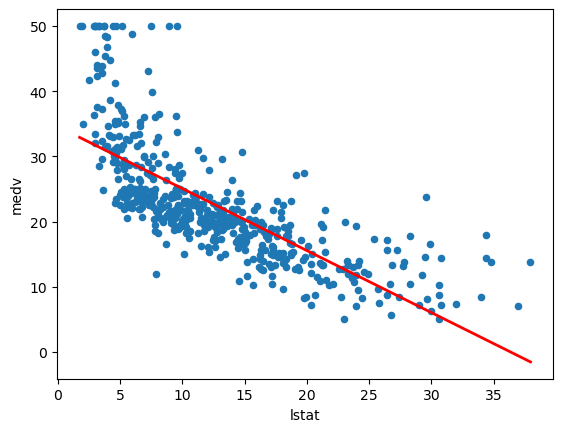

In [77]:
# plot the fitted line, we only take two extreme points to make the plot
X_new = pd.DataFrame({'lstat': [Boston.lstat.min(), Boston.lstat.max()]})
preds = lm.predict(X_new)
Boston.plot(kind='scatter', x='lstat', y='medv')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

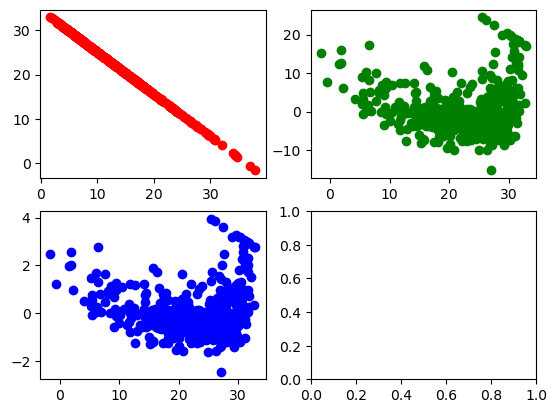

In [78]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(Boston.lstat, lm.predict(),'ro')
ax2.plot(lm.predict(), lm.resid, 'go')
ax3.plot(lm.predict(), lm.resid_pearson, 'bo')
plt.show()

## OLSResults.get_influence()

Calculate influence and outlier measures.

The instance containing methods to calculate the main influence and outlier measures for the OLS regression.

In [84]:
# the statistics of the linear regression mostly stored in lm.get_influence(), for example, the cookdistances, leverage.
print(lm.get_influence())
dir(lm.get_influence())
# for example, the following identifies the observation with the largest leverage 
np.argmax(lm.get_influence().hat_matrix_diag)

374

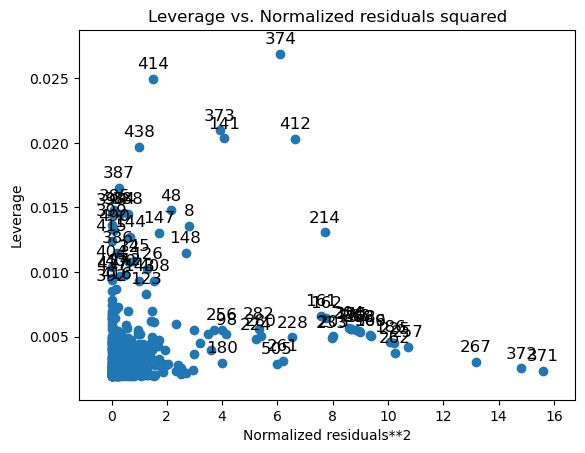

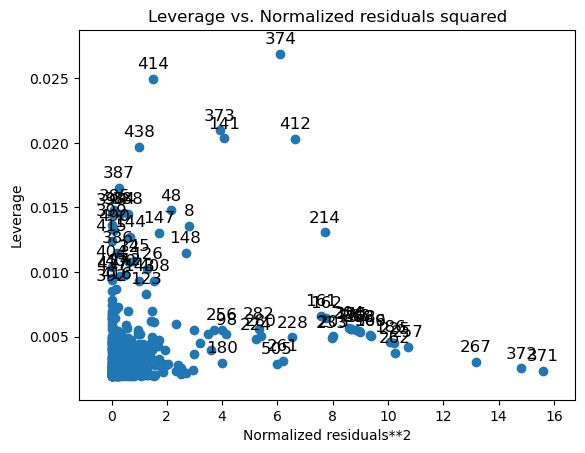

In [86]:
# from statsmodels.graphics.regressionplots import * just as a reference
plot_leverage_r esid2(lm)

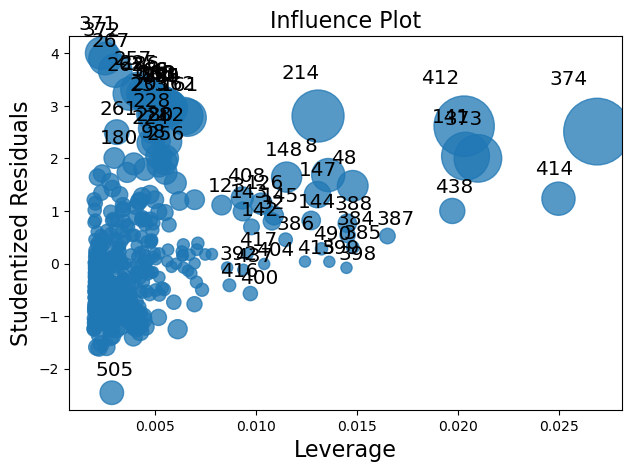

In [90]:
fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.tight_layout(pad=1.0)

In [7]:
# as mentioned above. For machine learning models, sklearn is the most common used module, 
# but sklearn is a little bit less on statistics.
x = pd.DataFrame(Boston.lstat)
y = Boston.medv
print(x.shape)

model = linear_model.LinearRegression()
model.fit(x, y)
print(model.intercept_)
print(model.coef_)

(506, 1)
34.55384087938311
[-0.95004935]


## 3.6.3 Multiple Linear Regression




In [92]:
# we can still use smg.ols to run multiple linear regression.
lm = smf.ols ('medv~lstat+age', data = Boston).fit()

In [93]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           2.98e-88
Time:                        15:35:08   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [94]:
# if we want to use all the variable. We can use the following trick to manually construct the list. In Python, most of time, you have to manully construct the variable list.
all_columns = "+".join(Boston.columns.difference(["medv"]))
my_formula = "medv~" + all_columns
lm = smf.ols(my_formula, data=Boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          6.72e-135
Time:                        15:35:11   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [ ]:
# unlike R, Python is not fully up speeded to all the statistics. If you want to have the VIF of the variables in LM, you have to code a little bit.
# from patsy import dmatrices
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
y, X = dmatrices(my_formula, data=Boston, return_type='dataframe')
vif_coeff = {}
for i in range(X.shape[1]):
    vif_coeff[X.columns[i]] = variance_inflation_factor(np.array(X.dropna()),i)
    
print(vif_coeff)

{'Intercept': 585.2652379423121, 'age': 3.1008255128153372, 'black': 1.3485210764063758, 'chas': 1.0739953275537883, 'crim': 1.7921915474332413, 'dis': 3.955944906372728, 'indus': 3.9915964183460315, 'lstat': 2.9414910780919366, 'nox': 4.393719847577493, 'ptratio': 1.7990840492488984, 'rad': 7.484496335274478, 'rm': 1.933744435783257, 'tax': 9.00855394759707, 'zn': 2.298758178749441}


## 3.6.4 Interaction Terms

In [ ]:
# we use * to add interaction terms
lm = smf.ols('medv~lstat * age', data=Boston).fit()
print(lm.summary())

## 3.6.5 Non-linear Transformations of the Predictors 

In [ ]:
lm_order1 = smf.ols('medv~ lstat', data=Boston).fit()
lm_order2 = smf.ols('medv~ lstat+ I(lstat ** 2.0)', data=Boston).fit()
print(lm_order2.summary())

In [ ]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(Boston.lstat, lm_order1.predict(),'ro')
ax3.plot(lm_order1.predict(), lm_order1.resid, 'go')
ax4.plot(lm_order1.predict(), lm_order1.resid_pearson, 'bo')
plt.show()

### if we added in the second order, we can see the residues are more random

In [ ]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(Boston.lstat,  lm_order2.predict(),'ro')
ax2.plot(Boston.lstat ** 2.0,  lm_order2.predict(),'ro')
ax3.plot(lm_order2.predict(), lm_order2.resid, 'go')
ax4.plot(lm_order2.predict(), lm_order2.resid_pearson, 'bo')
plt.show()

In [ ]:
# there is anova function built in already in statsmodels.  
# if you know what to do, use the key words to google it and likely you will find a very good answer. 
# here we compare the models with one order of stat and two orders of stats. 
# by looking at the p value that will reject the null hypothesis that the coefficent of lstat**2 equals 0.
table = sm.stats.anova_lm(lm_order1, lm_order2)
print(table)

In [ ]:
lm_log = smf.ols('medv~ np.log(rm)', data=Boston).fit()
lm_log.summary()

## 3.6.6 Qualitative Predictors 

I prepared the Carseats file from .Rdata. And it is saved under the data folder.  Let us load them in and explore this dataset.

In [ ]:
Carseats = pd.read_csv('data/Carseats.csv', header=0)

In [ ]:
list(Carseats)

In [ ]:
Carseats.dtypes

In [ ]:
Carseats.head()

In [ ]:
lm_carseats = smf.ols('Sales ~ Income + Advertising + Price + Age', data = Carseats).fit()

In [ ]:
lm_carseats.summary()

In [ ]:
# let us create dummy variables using get_dummies, then exclude the first dummy column
ShelveLoc_dummies = pd.get_dummies(Carseats.ShelveLoc, prefix='ShelveLoc').iloc[:,1:]

In [ ]:
Carseats_dummy = pd.concat([Carseats, ShelveLoc_dummies], axis=1)
Carseats_dummy.head()

In [ ]:
# then the model buliding will be the same with all numerrical variables.
lm_carseats_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + ShelveLoc_Good + ShelveLoc_Medium', 
                            data = Carseats_dummy).fit()

In [ ]:
# the interpretation of the coefficients are holding everything fixed, Medium shelve location is associated with an average
# increase of sale around 2.0046. 
lm_carseats_dummy.summary() 

In [ ]:
# Compapre the summary of two models, one with explicit encoding of dummy varible, while the other used the built-in function.
lm_carseats_wo_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + C(ShelveLoc)', 
                            data = Carseats).fit()
lm_carseats_wo_dummy.summary()

## 3.6.7 Writing Functions

In [ ]:
# let us write a simple function to print current time. 
# yhe key word in Python for user defined function is 'def'. 
# pay attention to the ':'. The difference betwwen R (others) and Python is that Python 
# forces you to obey its indentation rules. For example, the following function won't work because of the extra space in front of 'print'.
def print_current_time_wrong():
    from datetime import datetime # this is very bad practice !!! 
    print(str(datetime.now()))  

In [ ]:
def print_current_time():
    from datetime import datetime
    print (str(datetime.now())) 

In [ ]:
print_current_time()

In [122]:
n


506